In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

DATA PREPROCESSING

In [2]:
# Load datasets in the folder that you are saving the train.csv and test.csv
train_data = pd.read_csv("/Users/salonikhatu/Desktop/589 ML/Project/titanic/train.csv")
test_data = pd.read_csv("/Users/salonikhatu/Desktop/589 ML/Project/titanic/test.csv")

In [3]:
# Handle missing values in the training set
imputer_age = SimpleImputer(strategy='median')
train_data['Age'] = imputer_age.fit_transform(train_data[['Age']])
print(train_data['Age'])
imputer_fare = SimpleImputer(strategy='median')
train_data['Fare'] = imputer_fare.fit_transform(train_data[['Fare']])
print(train_data['Fare'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64


In [4]:
# Convert categorical variables to numerical representations in the training set
encoder = OneHotEncoder(drop='first', sparse=False)
train_encoded = pd.DataFrame(encoder.fit_transform(train_data[['Sex', 'Embarked']]))
print(train_encoded)

       0    1    2    3
0    1.0  0.0  1.0  0.0
1    0.0  0.0  0.0  0.0
2    0.0  0.0  1.0  0.0
3    0.0  0.0  1.0  0.0
4    1.0  0.0  1.0  0.0
..   ...  ...  ...  ...
886  1.0  0.0  1.0  0.0
887  0.0  0.0  1.0  0.0
888  0.0  0.0  1.0  0.0
889  1.0  0.0  0.0  0.0
890  1.0  1.0  0.0  0.0

[891 rows x 4 columns]


/Users/salonikhatu/anaconda3/envs/jax_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
# Concatenate encoded features with the original data in the training set
train_data = pd.concat([train_data, train_encoded], axis=1)
print(train_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [6]:
# Drop irrelevant columns in the training set
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'Sex', 'Embarked', 'SibSp', 'Parch']
train_data.drop(columns_to_drop, axis=1, inplace=True)
print(train_data)

     PassengerId  Survived  Pclass   Age     Fare    0    1    2    3
0              1         0       3  22.0   7.2500  1.0  0.0  1.0  0.0
1              2         1       1  38.0  71.2833  0.0  0.0  0.0  0.0
2              3         1       3  26.0   7.9250  0.0  0.0  1.0  0.0
3              4         1       1  35.0  53.1000  0.0  0.0  1.0  0.0
4              5         0       3  35.0   8.0500  1.0  0.0  1.0  0.0
..           ...       ...     ...   ...      ...  ...  ...  ...  ...
886          887         0       2  27.0  13.0000  1.0  0.0  1.0  0.0
887          888         1       1  19.0  30.0000  0.0  0.0  1.0  0.0
888          889         0       3  28.0  23.4500  0.0  0.0  1.0  0.0
889          890         1       1  26.0  30.0000  1.0  0.0  0.0  0.0
890          891         0       3  32.0   7.7500  1.0  1.0  0.0  0.0

[891 rows x 9 columns]


In [7]:
# Split the training data into the training set
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(X)
print(y)

     PassengerId  Pclass   Age     Fare    0    1    2    3
0              1       3  22.0   7.2500  1.0  0.0  1.0  0.0
1              2       1  38.0  71.2833  0.0  0.0  0.0  0.0
2              3       3  26.0   7.9250  0.0  0.0  1.0  0.0
3              4       1  35.0  53.1000  0.0  0.0  1.0  0.0
4              5       3  35.0   8.0500  1.0  0.0  1.0  0.0
..           ...     ...   ...      ...  ...  ...  ...  ...
886          887       2  27.0  13.0000  1.0  0.0  1.0  0.0
887          888       1  19.0  30.0000  0.0  0.0  1.0  0.0
888          889       3  28.0  23.4500  0.0  0.0  1.0  0.0
889          890       1  26.0  30.0000  1.0  0.0  0.0  0.0
890          891       3  32.0   7.7500  1.0  1.0  0.0  0.0

[891 rows x 8 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [8]:
# Now handle missing values in the test set
test_data['Age'] = imputer_age.transform(test_data[['Age']])
test_data['Fare'] = imputer_fare.transform(test_data[['Fare']])
print(test_data)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [9]:
# Convert categorical variables to numerical representations in the test set
test_encoded = pd.DataFrame(encoder.transform(test_data[['Sex', 'Embarked']]))
print(test_encoded)

       0    1    2    3
0    1.0  1.0  0.0  0.0
1    0.0  0.0  1.0  0.0
2    1.0  1.0  0.0  0.0
3    1.0  0.0  1.0  0.0
4    0.0  0.0  1.0  0.0
..   ...  ...  ...  ...
413  1.0  0.0  1.0  0.0
414  0.0  0.0  0.0  0.0
415  1.0  0.0  1.0  0.0
416  1.0  0.0  1.0  0.0
417  1.0  0.0  0.0  0.0

[418 rows x 4 columns]


In [10]:
# Concatenate encoded features with the original data in the test set
test_data = pd.concat([test_data, test_encoded], axis=1)

In [11]:
# Drop irrelevant columns in the test set
test_data.drop(columns_to_drop, axis=1, inplace=True)
test_data.columns = test_data.columns.astype(str) 

In [12]:
# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_valid.columns = X_valid.columns.astype(str)
print(X_train)

     PassengerId  Pclass   Age      Fare    0    1    2    3
331          332       1  45.5   28.5000  1.0  0.0  1.0  0.0
733          734       2  23.0   13.0000  1.0  0.0  1.0  0.0
382          383       3  32.0    7.9250  1.0  0.0  1.0  0.0
704          705       3  26.0    7.8542  1.0  0.0  1.0  0.0
813          814       3   6.0   31.2750  0.0  0.0  1.0  0.0
..           ...     ...   ...       ...  ...  ...  ...  ...
106          107       3  21.0    7.6500  0.0  0.0  1.0  0.0
270          271       1  28.0   31.0000  1.0  0.0  1.0  0.0
860          861       3  41.0   14.1083  1.0  0.0  1.0  0.0
435          436       1  14.0  120.0000  0.0  0.0  1.0  0.0
102          103       1  21.0   77.2875  1.0  0.0  1.0  0.0

[712 rows x 8 columns]


MODEL IMPLEMENTATION

In [13]:
# Hyperparameter tuning for Support Vector Machine
svm_param_grid = {'C': [1, 10], 'gamma': [0.01, 0.1], 'kernel': ['linear', 'rbf']}
svm_model = SVC()
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)
best_svm_model = svm_grid_search.best_estimator_

In [14]:
# Hyperparameter tuning for Neural Network
nn_param_grid = {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['logistic', 'tanh']}
nn_model = MLPClassifier(random_state=42, max_iter=500)
nn_grid_search = GridSearchCV(nn_model, nn_param_grid, cv=5, scoring='accuracy')
nn_grid_search.fit(X_train, y_train)
best_nn_model = nn_grid_search.best_estimator_

/Users/salonikhatu/anaconda3/envs/jax_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/salonikhatu/anaconda3/envs/jax_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10], 'min_samples_split': [2, 5]}
rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

MODEL SELECTION

In [16]:
# Use the selected models to make predictions on the test set
final_preds_svm = best_svm_model.predict(X_valid)
final_preds_nn = best_nn_model.predict(X_valid)
final_preds_rf = best_rf_model.predict(X_valid)

PERFORMANCE METRICS: CALCULATE ACCURACIES

In [17]:
# Calculate accuracies
accuracy_svm = accuracy_score(y_valid, final_preds_svm)
accuracy_nn = accuracy_score(y_valid, final_preds_nn)
accuracy_rf = accuracy_score(y_valid, final_preds_rf)

In [18]:
# Use the selected models to make predictions on the test set
final_preds_svm = best_svm_model.predict(test_data)
final_preds_nn = best_nn_model.predict(test_data)
final_preds_rf = best_rf_model.predict(test_data)

In [19]:
# Create separate DataFrames for each model's predictions
submission_svm = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': final_preds_svm})
submission_nn = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': final_preds_nn})
submission_rf = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': final_preds_rf})

.csv FILE GENERATION FOR EACH MODEL TO CHECK ACCURACY ON KAGGLE

In [20]:
# Save the submission files for each model, these will be created upon execution into the folder that you want.
submission_svm.to_csv('/Users/salonikhatu/Desktop/589 ML/Project/titanic/submission_svm.csv', index=False)
submission_nn.to_csv('/Users/salonikhatu/Desktop/589 ML/Project/titanic/submission_nn.csv', index=False)
submission_rf.to_csv('/Users/salonikhatu/Desktop/589 ML/Project/titanic/submission_rf.csv', index=False)

Support Vector Machine Accuracy: 0.7821229050279329
Neural Network Accuracy: 0.7262569832402235
Random Forest Accuracy: 0.8156424581005587


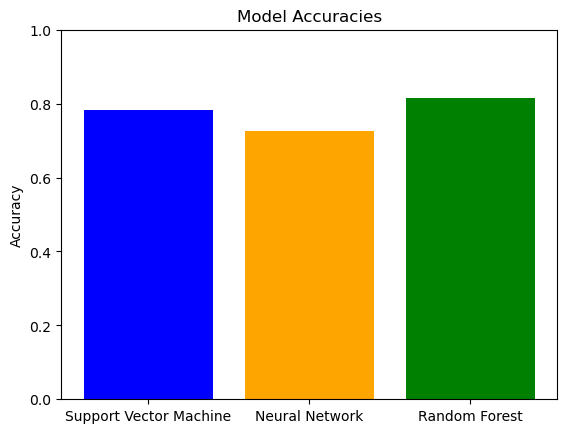

In [21]:
# Print accuracies
print("Support Vector Machine Accuracy:", accuracy_svm)
print("Neural Network Accuracy:", accuracy_nn)
print("Random Forest Accuracy:", accuracy_rf)

# Plot accuracies
models = ['Support Vector Machine', 'Neural Network', 'Random Forest']
accuracies = [accuracy_svm, accuracy_nn, accuracy_rf]

plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim([0, 1])
plt.show()